In [20]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version
%matplotlib inline

In [21]:
#img=plt.imread('data/young-woman-in-game-of-soccer-725x482.jpg')
img=plt.imread('data/mushroom.png')
img=np.mean(img,axis=2)
#from scipy import misc
#img = misc.face(gray=True)
img.shape

(244, 378)

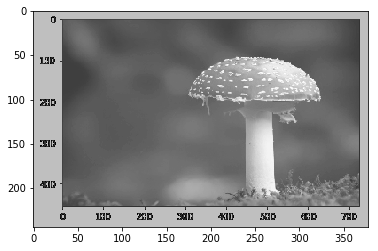

In [22]:
plt.imshow(img,cmap='gray')
plt.show()

In [23]:
n_clusters = 5
nrows=5
ncols=4
assert nrows*ncols>=n_clusters,'Diese Kombination führt zu fehlern weiter unten im code.'
np.random.seed(0)

In [36]:
# Der array sollte die Form Anz_Stichproben x Anz_features haben. Anzahl Features ist 1. (Grauwert)
X = img.reshape((-1, 1)) 
print(X.shape)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
kmeans_centers = k_means.cluster_centers_.squeeze()
#Die gefundenen Cluster-Centers
print(kmeans_centers)

(92232, 1)
[0.39594048 0.7459633  0.54518193 0.2832809  0.904423  ]


In [37]:
k_means.cluster_centers_

array([[0.39594048],
       [0.7459633 ],
       [0.54518193],
       [0.2832809 ],
       [0.904423  ]], dtype=float32)

(0.0, 22873.2)


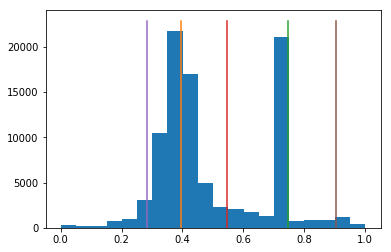

In [38]:
plt.hist(img.ravel(),20)
yl=plt.ylim()
print(yl)
for val in kmeans_centers:
    plt.plot([val,val],yl)

In [39]:
#Jeder Pixel erhält ein Label, ein zugeordnetes Cluster-Zentrum:
labels = k_means.labels_
print(labels)
labels.shape

[1 1 1 ... 1 1 1]


(92232,)

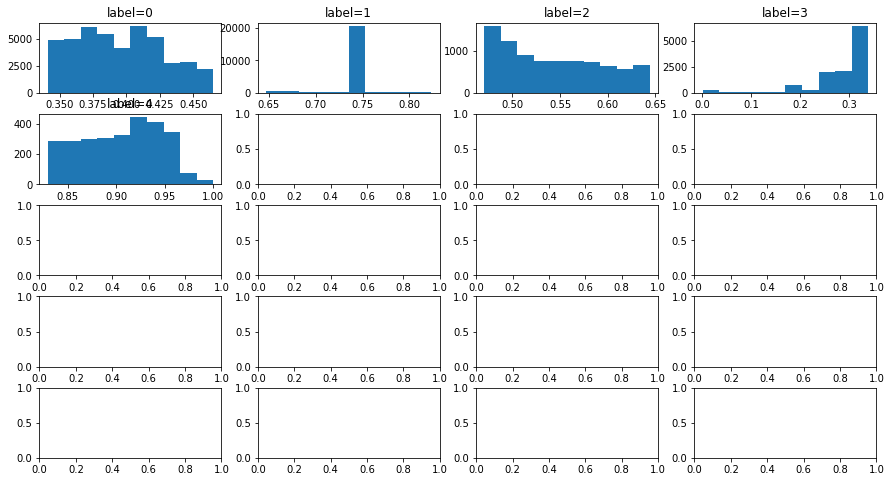

In [40]:
fig,axarr=plt.subplots(nrows,ncols,figsize=(15,8))
for lab in np.unique(labels):
    ax = axarr.ravel()[lab]
    ax.hist(img.ravel()[labels==lab],10)
    ax.set_title('label={0}'.format(lab))

fig.subplots_adjust(wspace=.2,hspace=.3)

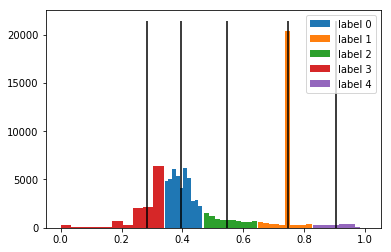

In [41]:
for lab in np.unique(labels):
    plt.hist(img.ravel()[labels==lab],10,label='label {0}'.format(lab))
ymin,ymax=plt.ylim()
plt.vlines(np.unique(kmeans_centers),ymin=ymin,ymax=ymax)

plt.legend(bbox_to_anchor=(1, 1))
plt.show()    

In [42]:
#Doku mässig hilfreich...
#?np.choose
#...ein Beispiel hilft besser:
np.choose([[1,0,2,3],[3,2,1,0]],['a','b','c','d'])

array([['b', 'a', 'c', 'd'],
       ['d', 'c', 'b', 'a']], dtype='<U1')

In [43]:
vmin = img.min()
vmax = img.max()

img_compressed = np.choose(labels, kmeans_centers)
img_compressed.shape = img.shape

In [44]:
#Die Farbwerte bestehen nun nur noch aus den Repräsentanten des k-means
print(sorted(kmeans_centers))
np.unique(img_compressed)

[0.2832809, 0.39594048, 0.54518193, 0.7459633, 0.904423]


array([0.2832809 , 0.39594048, 0.54518193, 0.7459633 , 0.904423  ],
      dtype=float32)

In [45]:
# Baue noch zum Vergleich ein Bild aus linear eingeteilten Gray bins:
regular_binedges = np.linspace(0, 256, n_clusters + 1)

regular_labels = np.searchsorted(regular_binedges, img) - 1
regular_values = .5 * (regular_binedges[1:] + regular_binedges[:-1])  # mean
#für jedes Pixel, wähle das dem label zugehörige Grauwerteelement aus dem
#array regular_values. 
regular_img = np.choose(regular_labels.ravel(), regular_values, 
                         mode="clip")
regular_img.shape = img.shape

In [46]:
#Zum Verständnis der obigen Zeilen:
np.searchsorted?
print(regular_labels.shape)
np.unique(regular_labels)

(244, 378)


array([0])

In [47]:
#Zum Verständnis der obigen Zeilen:
print(np.unique(regular_img))
regular_values

[25.6]


array([ 25.6,  76.8, 128. , 179.2, 230.4])

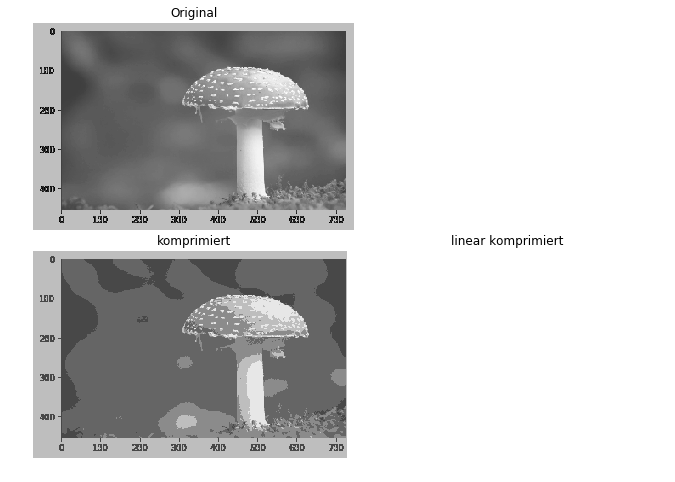

In [48]:
fig,axarr=plt.subplots(2,2,figsize=(15,8));
fig.subplots_adjust(wspace=-0.4,hspace=.1);
axarr[0,0].imshow(img, cmap=plt.cm.gray, vmin=vmin, vmax=vmax);
axarr[0,0].set_title('Original');
axarr[0,0].axis('off');
fig.delaxes(axarr[0,1]);

axarr[1,0].imshow(img_compressed, cmap=plt.cm.gray, 
                  vmin=vmin, vmax=vmax);
axarr[1,0].set_title('komprimiert');
axarr[1,0].axis('off');
axarr[1,1].imshow(regular_img, cmap=plt.cm.gray, 
                  vmin=vmin, vmax=vmax)
axarr[1,1].set_title('linear komprimiert');
axarr[1,1].axis('off');

In [17]:
np.unique(img_compressed)

array([  21.,   43.,   66.,  124.,  205.])

In [18]:
#k-means Balken-Mittelpunkte
sorted_kmeans_centers=np.sort(kmeans_centers)
#Daraus abgeleitete Bingrenzen
kMeans_binEdges = np.around([0]+list((sorted_kmeans_centers[:-1]+sorted_kmeans_centers[1:])/2)+[255])

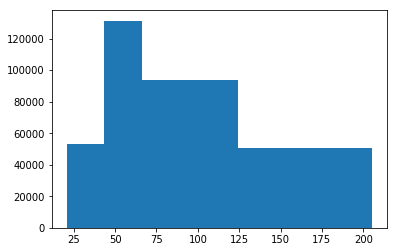

In [19]:
plt.hist(img_compressed.ravel(),bins=sorted_kmeans_centers);

array([  25.6,   76.8,  128. ,  179.2,  230.4])

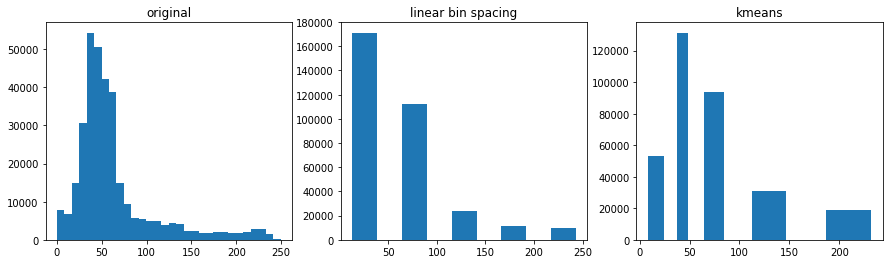

In [63]:
#Die gewählte Anzahl bins (nbins) ist hier willkürlich
nbins=30
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.hist(img.ravel(),nbins,label='original',rwidth=1,align='mid');
plt.title('original')

#durch das Clustern sind die folgenden zwei Histogramme vom gewählten binning 
#weitgehend unabhängig:
plt.subplot(1,3,2)
plt.hist(regular_img.ravel(),bins=regular_binedges,rwidth=0.5,label='linear bin spacing',align='mid');
plt.title('linear bin spacing')

plt.subplot(1,3,3)
plt.title('kmeans')
counts,bins,patches=plt.hist(img_compressed.ravel(),bins=kMeans_binEdges,label='kmeans',rwidth=0.5,align='mid');
regular_values

In [66]:
#Binpositionen:
print(bins)
#Pixel counts in den bins
counts

[   0.   32.   54.   95.  164.  255.]


array([  53398.,  131343.,   93980.,   31233.,   19196.])

Die Bins des k-Means haben sich an die Grauwertehäufigkeiten angepasst: Für das Bild 'mushroom.jpg' und 5 Clusterzentren ergeben sich im Bereich der Pixelwerte 0-100, wo die meisten Pixelwerte liegen, 3 Clusterzenten. Bei einer linearen Verteilung sind in diesem Bereich nur zwei Zentren zu finden.